In [1]:
from data import get_df, num_sift_kp
print("num_sift_kp=" + str(num_sift_kp))
df = get_df()
print df.shape
print df.dtypes
print df.head()

num_sift_kp=25
(200, 4)
name                     object
class                  category
sift_key_points          object
sift_kp_descriptors      object
dtype: object
           name class                                    sift_key_points  \
0  image001.JPG     0  [{u'pt': (123.904953003, 140.342391968), u'ang...   
1  image002.JPG     0  [{u'pt': (156.000778198, 182.117752075), u'ang...   
2  image003.JPG     0  [{u'pt': (112.154243469, 122.479042053), u'ang...   
3  image004.JPG     0  [{u'pt': (191.072982788, 121.957305908), u'ang...   
4  image006.JPG     1  [{u'pt': (112.855133057, 91.5557556152), u'ang...   

                                 sift_kp_descriptors  
0  [[20, 59, 25, 58, 16, 2, 2, 1, 76, 75, 47, 47,...  
1  [[7, 19, 8, 1, 1, 0, 16, 16, 6, 16, 20, 11, 1,...  
2  [[138, 2, 0, 0, 55, 7, 0, 3, 53, 10, 0, 0, 142...  
3  [[10, 42, 7, 2, 84, 81, 6, 0, 74, 109, 3, 2, 8...  
4  [[100, 7, 0, 0, 22, 35, 44, 53, 61, 5, 0, 0, 1...  


In [2]:
import numpy as np
sift_descriptors = np.array(list(df["sift_kp_descriptors"])).reshape((200 * num_sift_kp, 128))
print sift_descriptors.shape

(5000, 128)


In [3]:
from scipy.spatial.distance import pdist, squareform
K_vectors = squareform(pdist(sift_descriptors, "euclidean"))  # pairwise Euclidean distances of vectors
print K_vectors.shape
print K_vectors

(5000, 5000)
[[   0.          541.65579476  593.70362977 ...,  468.06089347
   448.93317988  587.36615497]
 [ 541.65579476    0.          532.50070422 ...,  619.11226769
   594.79240076  564.41119762]
 [ 593.70362977  532.50070422    0.         ...,  601.37592236
   615.93587329  427.37922271]
 ..., 
 [ 468.06089347  619.11226769  601.37592236 ...,    0.          513.27575435
   624.94319742]
 [ 448.93317988  594.79240076  615.93587329 ...,  513.27575435    0.
   650.34144878]
 [ 587.36615497  564.41119762  427.37922271 ...,  624.94319742
   650.34144878    0.        ]]


<matplotlib.colorbar.Colorbar instance at 0x113b493b0>

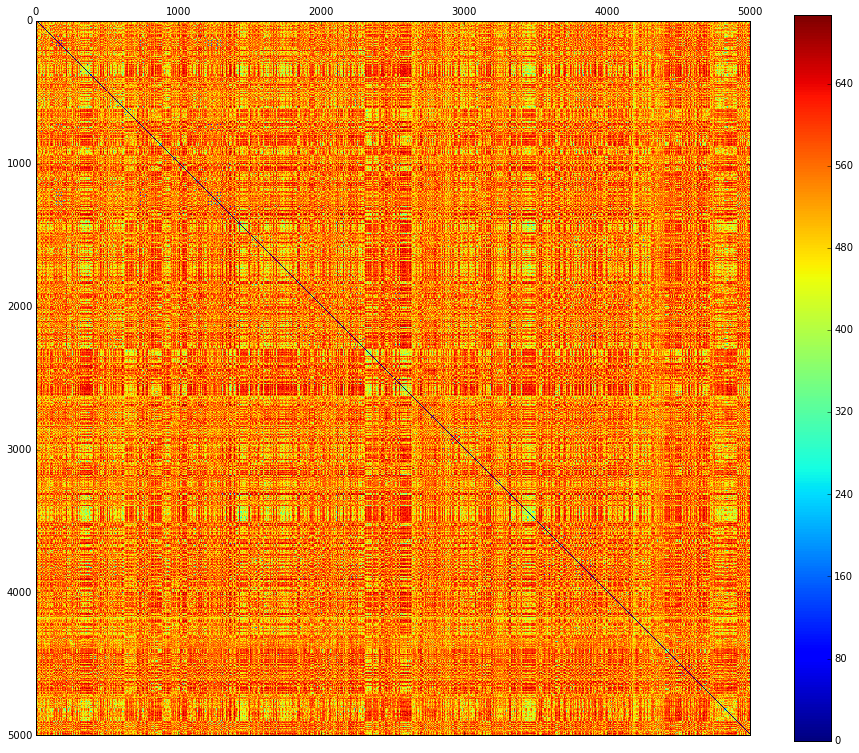

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(16, 13))
ax = fig.add_subplot(111)
heatmap = ax.matshow(K_vectors)
fig.colorbar(heatmap)

In [5]:
# the pairwise distance of classes is defined as the sum of inter/intra-class pairwise distance of vectors
K_classes = np.empty((50, 50))
for i in range(0, 50):
    for j in range(0, 50):
        row_from = 4 * num_sift_kp * i
        row_to = 4 * num_sift_kp * (i + 1)
        col_from = 4 * num_sift_kp * j
        col_to = 4 * num_sift_kp * (j + 1)
        K_classes[i, j] = K_vectors[row_from:row_to, col_from:col_to].sum(axis=(0, 1))
print K_classes.shape
print K_classes

(50, 50)
[[ 4872019.77427208  5197976.66568808  5215033.36896866 ...,
   5144050.83735232  4972815.27155935  5375673.73775987]
 [ 5197976.66568808  5145082.039328    5398060.74249811 ...,
   5343414.54256657  5197527.01625837  5394120.73442601]
 [ 5215033.36896866  5398060.74249811  5308380.02041327 ...,
   5300648.82185821  5216221.7481804   5474636.23462863]
 ..., 
 [ 5144050.83735232  5343414.54256657  5300648.82185821 ...,
   5088567.05748461  5133348.266197    5454359.18574535]
 [ 4972815.27155935  5197527.01625837  5216221.7481804  ...,
   5133348.266197    4700245.52920621  5477913.3462206 ]
 [ 5375673.73775987  5394120.73442601  5474636.23462863 ...,
   5454359.18574535  5477913.3462206   5268134.84920105]]


<matplotlib.colorbar.Colorbar instance at 0x113b38cb0>

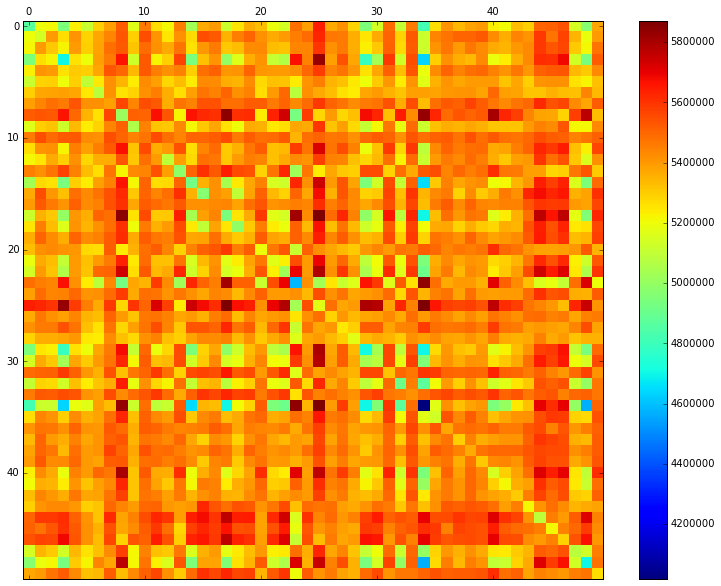

In [6]:
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)
heatmap = ax.matshow(K_classes, aspect='auto')
fig.colorbar(heatmap)